In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 第一步：读取TIF格式的base图片数据
base_file_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.9\base1.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 第二步：读取result1.tif图片
result_file_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.9\result1.tif'
result_image = Image.open(result_file_path)
result_data = np.array(result_image)

# 获取选定点的光强值
print(f"\n处理result1的结果:")
selected_values = []
for position in selected_positions:
    value = result_data[position]
    selected_values.append(value)
    print(f"坐标{position}对应的数值为: {value}")

# 第三步：绘制图像
# 绘制base图片的原始图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Original Intensity Distribution from base.tif')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制标记四个最大光强点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记四个最大光强的位置
for i, (x, y) in enumerate(selected_positions, start=1):
    plt.scatter(y, x, color='blue', marker='o', s=100, edgecolor='white')
    plt.text(y, x, f'{i}', color='white', ha='center', va='center', fontsize=12)

plt.title('Intensity Distribution with Top 4 Points Marked')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制第一大和第二大点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记第一大和第二大光强的位置
plt.scatter(top_positions_base[0][1], top_positions_base[0][0], color='red', marker='o', s=150, edgecolor='white', label='First Max')
plt.scatter(top_positions_base[1][1], top_positions_base[1][0], color='blue', marker='o', s=150, edgecolor='white', label='Second Max')

# 在点上添加标签
plt.text(top_positions_base[0][1], top_positions_base[0][0], '1', color='white', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(top_positions_base[1][1], top_positions_base[1][0], '2', color='white', ha='center', va='center', fontsize=14, fontweight='bold')

plt.title('Intensity Distribution with First and Second Maximum Points')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.legend(loc='upper right')
plt.show()


ModuleNotFoundError: No module named 'numpy'

第一大和第二大点的中心坐标为: (1143, 1610)
选中的四个点的坐标为:
(1139, 2087)
(1473, 1279)
(1468, 1952)
(1604, 1615)

处理result1到result5的平均结果:
坐标(1139, 2087)对应的平均数值为: 308.6
坐标(1473, 1279)对应的平均数值为: 378.8
坐标(1468, 1952)对应的平均数值为: 10655.4
坐标(1604, 1615)对应的平均数值为: 321.0

处理result6到result10的平均结果:
坐标(1139, 2087)对应的平均数值为: 353.2
坐标(1473, 1279)对应的平均数值为: 290.6
坐标(1468, 1952)对应的平均数值为: 10582.4
坐标(1604, 1615)对应的平均数值为: 323.2

处理result11到result15的平均结果:
坐标(1139, 2087)对应的平均数值为: 308.6
坐标(1473, 1279)对应的平均数值为: 349.8
坐标(1468, 1952)对应的平均数值为: 9214.0
坐标(1604, 1615)对应的平均数值为: 318.0

处理result16到result20的平均结果:
坐标(1139, 2087)对应的平均数值为: 287.0
坐标(1473, 1279)对应的平均数值为: 309.6
坐标(1468, 1952)对应的平均数值为: 8791.8
坐标(1604, 1615)对应的平均数值为: 361.0

处理result21到result25的平均结果:
坐标(1139, 2087)对应的平均数值为: 394.2
坐标(1473, 1279)对应的平均数值为: 285.0
坐标(1468, 1952)对应的平均数值为: 9083.0
坐标(1604, 1615)对应的平均数值为: 337.0

处理result26到result30的平均结果:
坐标(1139, 2087)对应的平均数值为: 483.2
坐标(1473, 1279)对应的平均数值为: 297.8
坐标(1468, 1952)对应的平均数值为: 8850.2
坐标(1604, 1615)对应的平均数值为: 467.0

处理result31到result35

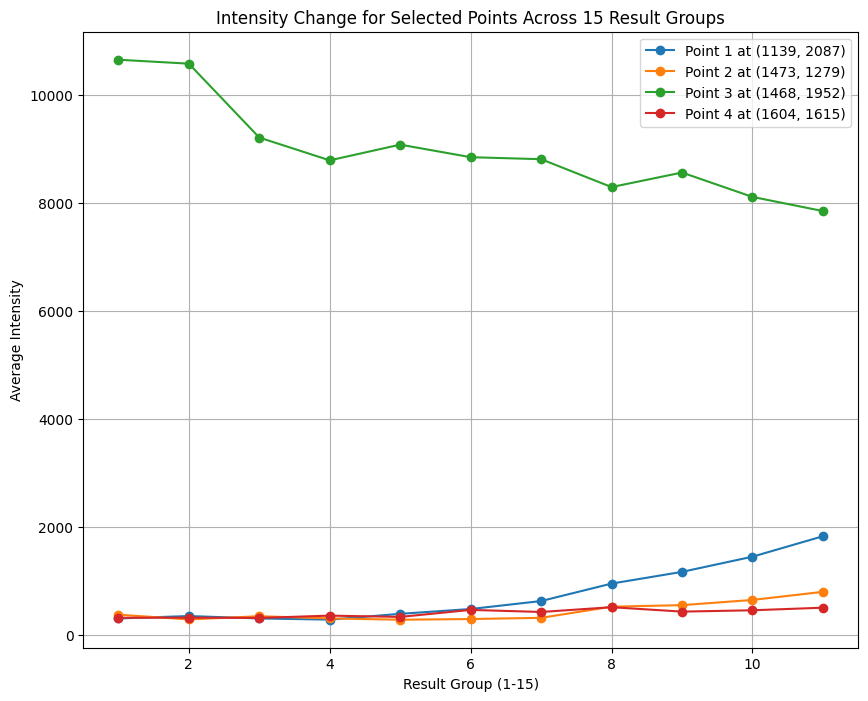

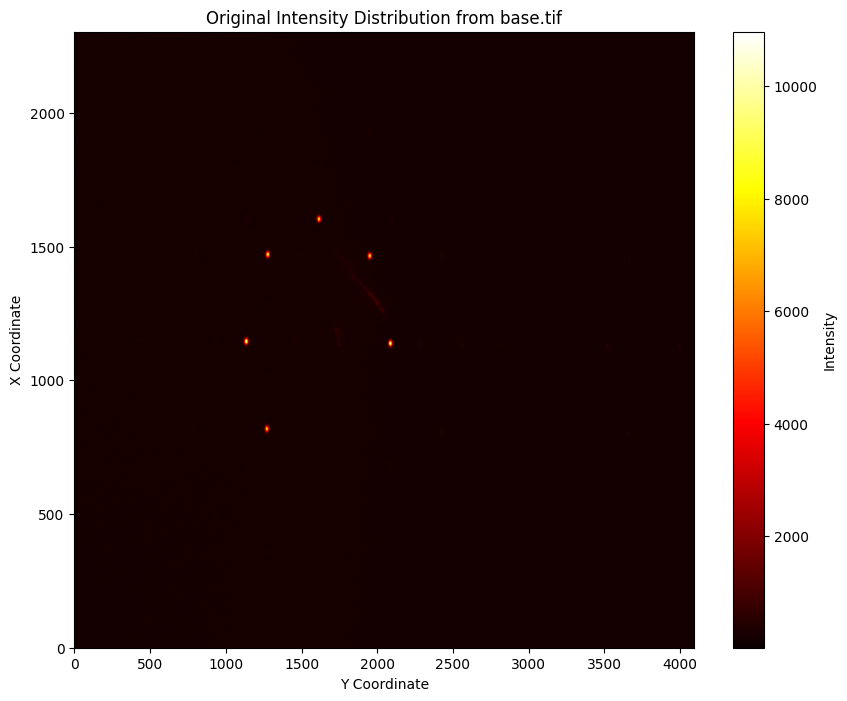

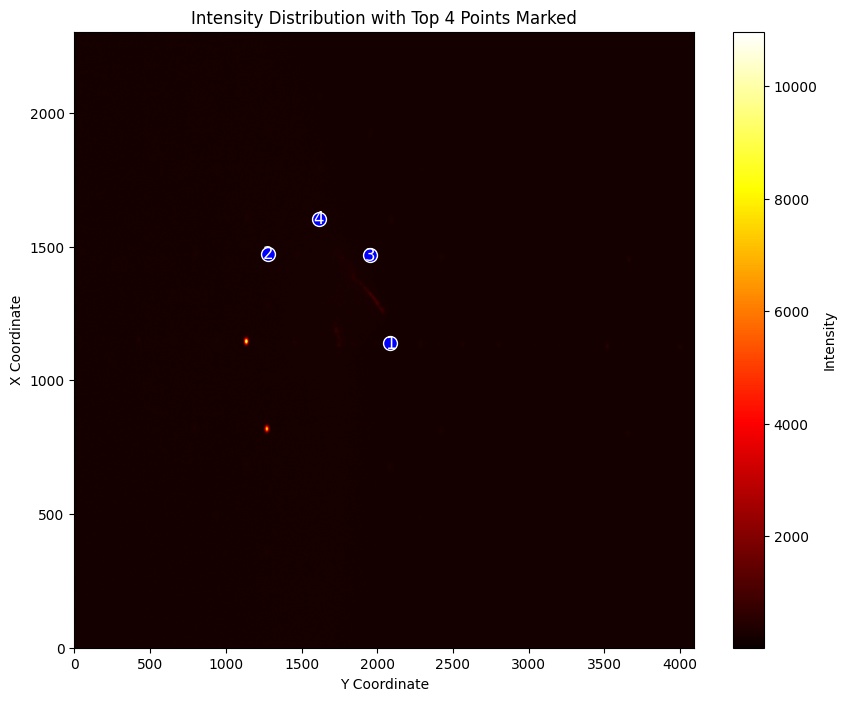

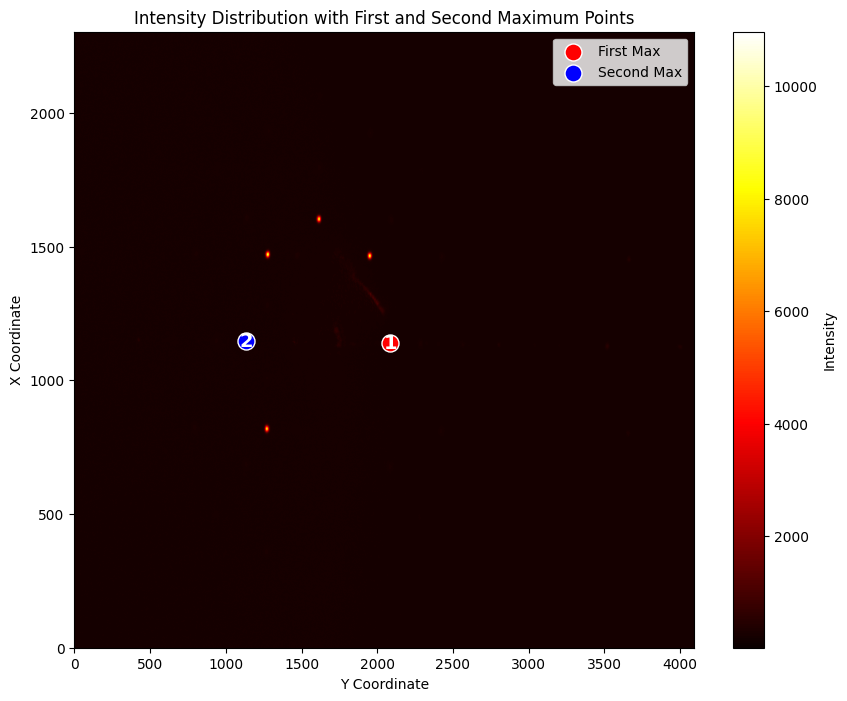

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 第一步：读取TIF格式的base图片数据
base_file_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 21 25到20.5 25\base1.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 初始化列表来存储每个光强点的数值变化
value_changes = {pos: [] for pos in selected_positions}

# 第二步：读取result1到result75图片，按每5个做一次平均
result_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 21 25到20.5 25'
total_results = 55
group_size = 5
num_groups = total_results // group_size  # 每组5个，生成15组平均结果

for group in range(num_groups):
    result_avg = None
    start_index = group * group_size + 1  # 每组的起始索引，例如第1组是1-5，第2组是6-10
    
    # 遍历每组的5个result文件
    for i in range(start_index, start_index + group_size):
        result_file_path = os.path.join(result_path, f'result{i}.tif')
        result_image = Image.open(result_file_path)
        result_data = np.array(result_image)

        if result_avg is None:
            result_avg = result_data.astype(np.float64)
        else:
            result_avg += result_data.astype(np.float64)

    # 计算该组的平均值
    result_avg /= group_size

    # 获取之前选定点的平均数值
    selected_values = []
    print(f"\n处理result{start_index}到result{start_index + group_size - 1}的平均结果:")
    for position in selected_positions:
        value = result_avg[position]
        value_changes[position].append(value)  # 记录每个光强点的值变化
        print(f"坐标{position}对应的平均数值为: {value}")

# 第三步：绘制四个光强点的数值变化在同一张图中
plt.figure(figsize=(10, 8))
for i, position in enumerate(selected_positions, start=1):
    plt.plot(range(1, num_groups + 1), value_changes[position], marker='o', linestyle='-', label=f'Point {i} at {position}')

plt.title('Intensity Change for Selected Points Across 15 Result Groups')
plt.xlabel('Result Group (1-15)')
plt.ylabel('Average Intensity')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 第四步：绘制图像
# 绘制base图片的原始图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Original Intensity Distribution from base.tif')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制标记四个最大光强点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记四个最大光强的位置
for i, (x, y) in enumerate(selected_positions, start=1):
    plt.scatter(y, x, color='blue', marker='o', s=100, edgecolor='white')
    plt.text(y, x, f'{i}', color='white', ha='center', va='center', fontsize=12)

plt.title('Intensity Distribution with Top 4 Points Marked')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制第一大和第二大点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记第一大和第二大光强的位置
plt.scatter(top_positions_base[0][1], top_positions_base[0][0], color='red', marker='o', s=150, edgecolor='white', label='First Max')
plt.scatter(top_positions_base[1][1], top_positions_base[1][0], color='blue', marker='o', s=150, edgecolor='white', label='Second Max')

# 在点上添加标签
plt.text(top_positions_base[0][1], top_positions_base[0][0], '1', color='white', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(top_positions_base[1][1], top_positions_base[1][0], '2', color='white', ha='center', va='center', fontsize=14, fontweight='bold')

plt.title('Intensity Distribution with First and Second Maximum Points')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.legend(loc='upper right')
plt.show()


第一大和第二大点的中心坐标为: (1143, 1610)
选中的四个点的坐标为:
(1139, 2087)
(1473, 1279)
(1468, 1952)
(1604, 1615)
底噪值为: 220.9375

处理result1到result5的平均结果:
坐标(1139, 2087)对应的平均数值为: 87.66250000000002
坐标(1473, 1279)对应的平均数值为: 157.8625
坐标(1468, 1952)对应的平均数值为: 10434.4625
坐标(1604, 1615)对应的平均数值为: 100.0625

处理result6到result10的平均结果:
坐标(1139, 2087)对应的平均数值为: 132.2625
坐标(1473, 1279)对应的平均数值为: 69.66250000000002
坐标(1468, 1952)对应的平均数值为: 10361.4625
坐标(1604, 1615)对应的平均数值为: 102.26249999999999

处理result11到result15的平均结果:
坐标(1139, 2087)对应的平均数值为: 87.66250000000002
坐标(1473, 1279)对应的平均数值为: 128.8625
坐标(1468, 1952)对应的平均数值为: 8993.0625
坐标(1604, 1615)对应的平均数值为: 97.0625

处理result16到result20的平均结果:
坐标(1139, 2087)对应的平均数值为: 66.0625
坐标(1473, 1279)对应的平均数值为: 88.66250000000002
坐标(1468, 1952)对应的平均数值为: 8570.8625
坐标(1604, 1615)对应的平均数值为: 140.0625

处理result21到result25的平均结果:
坐标(1139, 2087)对应的平均数值为: 173.2625
坐标(1473, 1279)对应的平均数值为: 64.0625
坐标(1468, 1952)对应的平均数值为: 8862.0625
坐标(1604, 1615)对应的平均数值为: 116.0625

处理result26到result30的平均结果:
坐标(1139, 2087)对应的平均数值为:

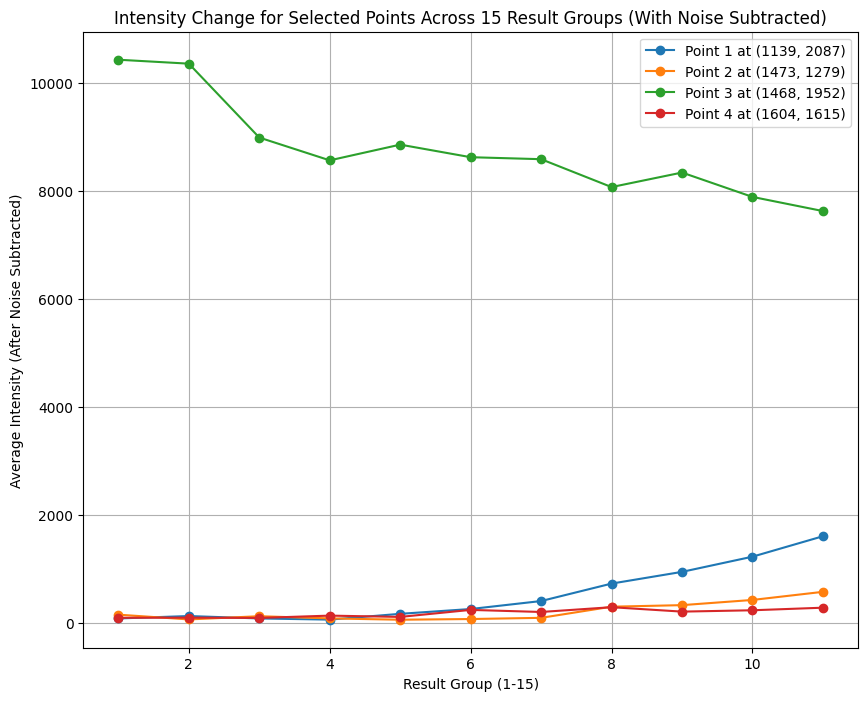

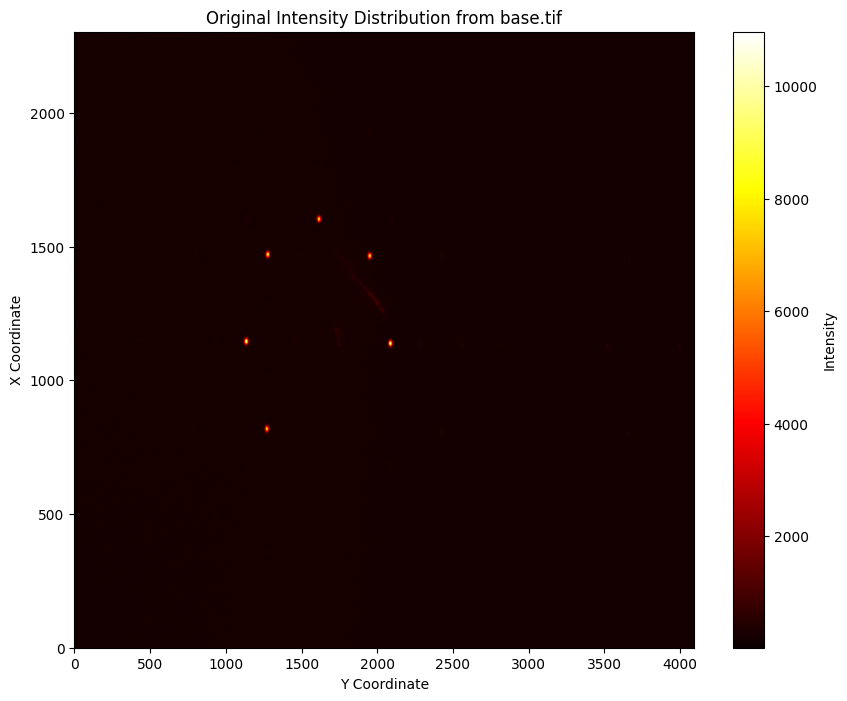

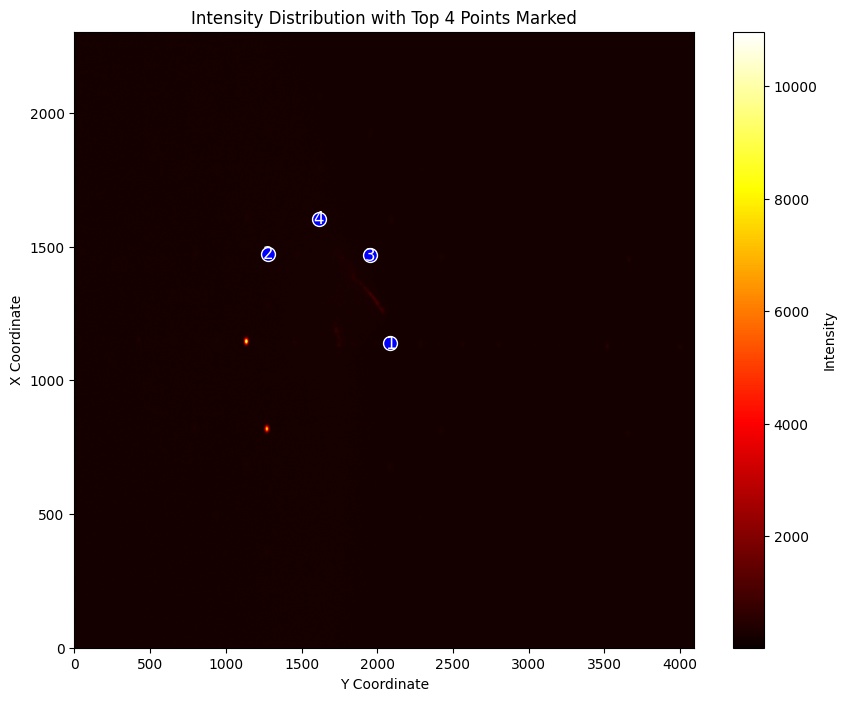

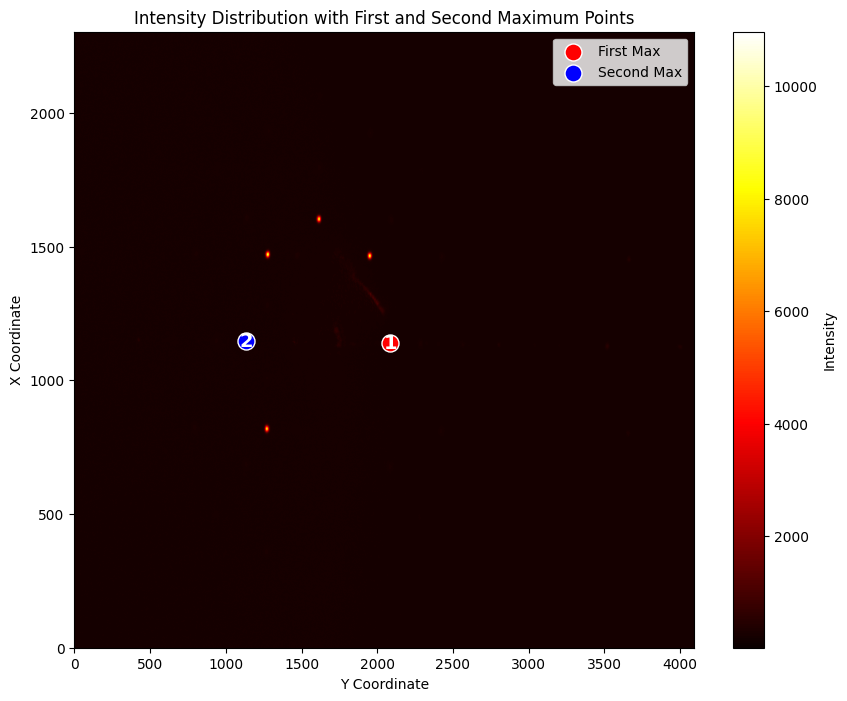

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 第一步：读取TIF格式的base图片数据
base_file_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 21 25到20.5 25\base1.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 初始化列表来存储每个光强点的数值变化
value_changes = {pos: [] for pos in selected_positions}

# 第二步：计算底噪值
# 选择图片四个角靠内的 4×4 区域，行在20到24，列在20到24
def calculate_noise(image_data):
    corners = [
        image_data[20:24, 20:24],  # 左上角
        image_data[20:24, -24:-20],  # 右上角
        image_data[-24:-20, 20:24],  # 左下角
        image_data[-24:-20, -24:-20],  # 右下角
    ]
    noise_values = [corner.mean() for corner in corners]  # 每个角的平均值
    noise_average = np.mean(noise_values)  # 计算所有角的平均值
    return noise_average

# 计算base图片的底噪值
base_noise = calculate_noise(base_data)
print(f"底噪值为: {base_noise}")

# 第三步：读取result1到result75图片，按每5个做一次平均
result_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 21 25到20.5 25'
total_results = 55
group_size = 5
num_groups = total_results // group_size  # 每组5个，生成15组平均结果

for group in range(num_groups):
    result_avg = None
    start_index = group * group_size + 1  # 每组的起始索引，例如第1组是1-5，第2组是6-10
    
    # 遍历每组的5个result文件
    for i in range(start_index, start_index + group_size):
        result_file_path = os.path.join(result_path, f'result{i}.tif')
        result_image = Image.open(result_file_path)
        result_data = np.array(result_image)

        if result_avg is None:
            result_avg = result_data.astype(np.float64)
        else:
            result_avg += result_data.astype(np.float64)

    # 计算该组的平均值
    result_avg /= group_size

    # 获取之前选定点的平均数值并减去底噪
    selected_values = []
    print(f"\n处理result{start_index}到result{start_index + group_size - 1}的平均结果:")
    for position in selected_positions:
        value = result_avg[position] - base_noise  # 减去底噪
        value_changes[position].append(value)  # 记录每个光强点的值变化
        print(f"坐标{position}对应的平均数值为: {value}")

# 第四步：绘制四个光强点的数值变化在同一张图中
plt.figure(figsize=(10, 8))
for i, position in enumerate(selected_positions, start=1):
    plt.plot(range(1, num_groups + 1), value_changes[position], marker='o', linestyle='-', label=f'Point {i} at {position}')

plt.title('Intensity Change for Selected Points Across 15 Result Groups (With Noise Subtracted)')
plt.xlabel('Result Group (1-15)')
plt.ylabel('Average Intensity (After Noise Subtracted)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 第五步：绘制图像
# 绘制base图片的原始图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')
plt.title('Original Intensity Distribution from base.tif')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制标记四个最大光强点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记四个最大光强的位置
for i, (x, y) in enumerate(selected_positions, start=1):
    plt.scatter(y, x, color='blue', marker='o', s=100, edgecolor='white')
    plt.text(y, x, f'{i}', color='white', ha='center', va='center', fontsize=12)

plt.title('Intensity Distribution with Top 4 Points Marked')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.show()

# 绘制第一大和第二大点的图像
plt.figure(figsize=(10, 8))
plt.imshow(df_original_base, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Intensity')

# 标记第一大和第二大光强的位置
plt.scatter(top_positions_base[0][1], top_positions_base[0][0], color='red', marker='o', s=150, edgecolor='white', label='First Max')
plt.scatter(top_positions_base[1][1], top_positions_base[1][0], color='blue', marker='o', s=150, edgecolor='white', label='Second Max')

# 在点上添加标签
plt.text(top_positions_base[0][1], top_positions_base[0][0], '1', color='white', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(top_positions_base[1][1], top_positions_base[1][0], '2', color='white', ha='center', va='center', fontsize=14, fontweight='bold')

plt.title('Intensity Distribution with First and Second Maximum Points')
plt.xlabel('Y Coordinate')
plt.ylabel('X Coordinate')
plt.legend(loc='upper right')
plt.show()


第一大和第二大点的中心坐标为: (1142, 1608)
选中的四个点的坐标为:
(1145, 1132)
(819, 1270)
(1470, 1272)
(1603, 1610)
底噪值为: 221.78125

处理result1到result5的平均结果:
坐标(1145, 1132)对应的平均数值为: 1188.01875, 标准差为: 369.4581979060689
坐标(819, 1270)对应的平均数值为: 10202.01875, 标准差为: 415.15317655053536
坐标(1470, 1272)对应的平均数值为: 830.21875, 标准差为: 233.35552275444437
坐标(1603, 1610)对应的平均数值为: 217.81875000000002, 标准差为: 99.18185317889558

处理result6到result10的平均结果:
坐标(1145, 1132)对应的平均数值为: 464.41875000000005, 标准差为: 107.69846795567707
坐标(819, 1270)对应的平均数值为: 8966.61875, 标准差为: 630.6049793650539
坐标(1470, 1272)对应的平均数值为: 929.41875, 标准差为: 221.57833829144943
坐标(1603, 1610)对应的平均数值为: 60.21875, 标准差为: 45.45327270945405

处理result11到result15的平均结果:
坐标(1145, 1132)对应的平均数值为: 831.21875, 标准差为: 152.31152287335323
坐标(819, 1270)对应的平均数值为: 8576.81875, 标准差为: 627.3654756200726
坐标(1470, 1272)对应的平均数值为: 1347.81875, 标准差为: 151.81778551935213
坐标(1603, 1610)对应的平均数值为: 82.21875, 标准差为: 36.41977484828812

处理result16到result20的平均结果:
坐标(1145, 1132)对应的平均数值为: 1171.21875, 标准差为: 164.35206113

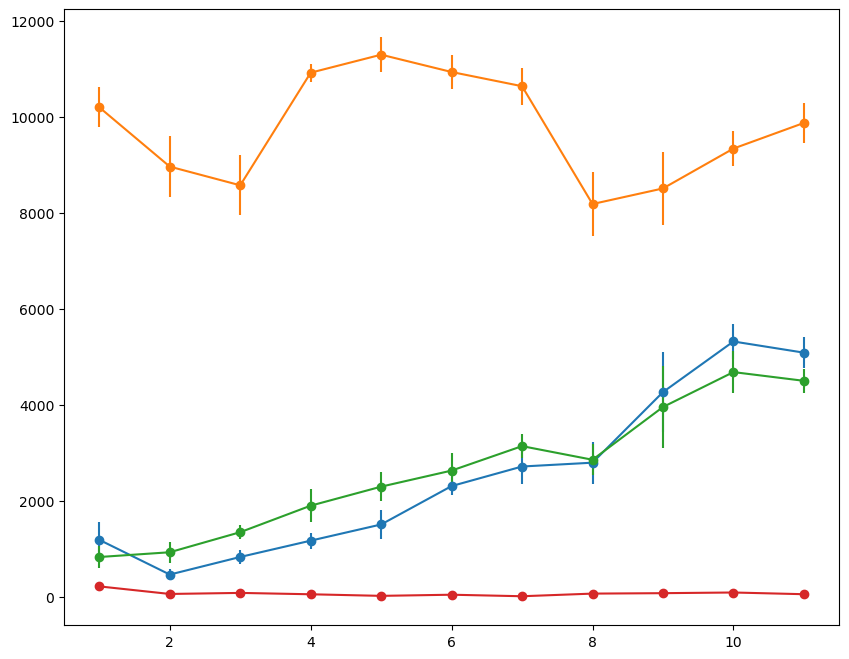

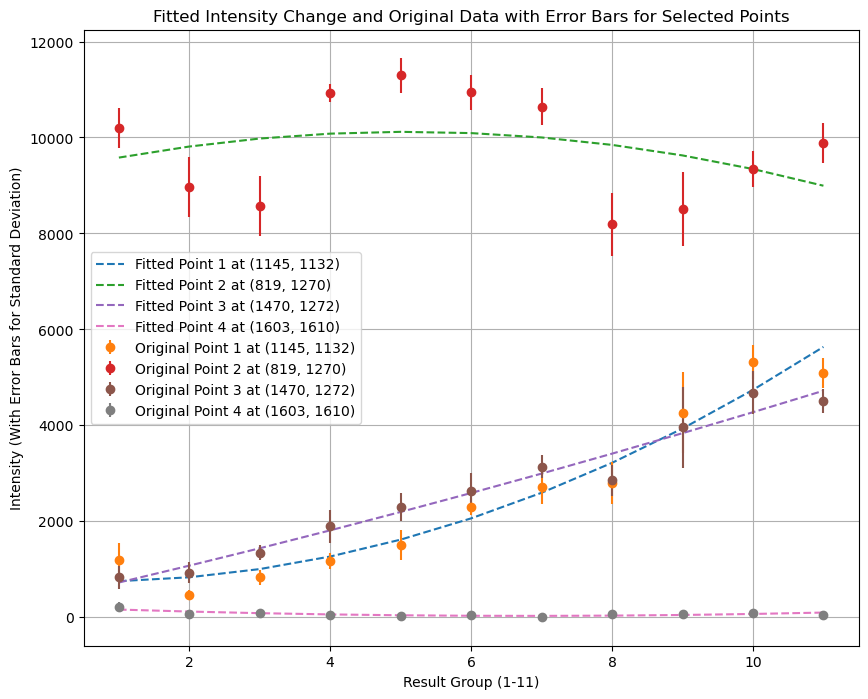

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from numpy.polynomial.polynomial import Polynomial
# 第一步：读取TIF格式的base图片数据
base_file_path = r'E:\桌面\wkx1\程序\HCL\9.11 距离21.5到20.5\base1.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 初始化列表来存储每个光强点的数值变化和标准差
value_changes = {pos: [] for pos in selected_positions}
value_stddevs = {pos: [] for pos in selected_positions}  # 记录标准差

# 第二步：计算底噪值
# 选择图片四个角靠内的 4×4 区域，行在20到24，列在20到24
def calculate_noise(image_data):
    corners = [
        image_data[20:24, 20:24],  # 左上角
        image_data[20:24, -24:-20],  # 右上角
        image_data[-24:-20, 20:24],  # 左下角
        image_data[-24:-20, -24:-20],  # 右下角
    ]
    noise_values = [corner.mean() for corner in corners]  # 每个角的平均值
    noise_average = np.mean(noise_values)  # 计算所有角的平均值
    return noise_average

# 计算base图片的底噪值
base_noise = calculate_noise(base_data)
print(f"底噪值为: {base_noise}")

# 第三步：读取result1到result75图片，按每5个做一次平均并计算标准差
result_path = r'E:\桌面\wkx1\程序\HCL\9.11 距离21.5到20.5'
total_results = 55
group_size = 5
num_groups = total_results // group_size  # 每组5个，生成11组平均结果

for group in range(num_groups):
    result_avg = None
    result_values_per_group = {pos: [] for pos in selected_positions}  # 临时存储每组的每个点值
    start_index = group * group_size + 1  # 每组的起始索引，例如第1组是1-5，第2组是6-10
    
    # 遍历每组的5个result文件
    for i in range(start_index, start_index + group_size):
        result_file_path = os.path.join(result_path, f'result{i}.tif')
        result_image = Image.open(result_file_path)
        result_data = np.array(result_image)

        if result_avg is None:
            result_avg = result_data.astype(np.float64)
        else:
            result_avg += result_data.astype(np.float64)

        # 记录每个点的光强值
        for position in selected_positions:
            result_values_per_group[position].append(result_data[position])

    # 计算该组的平均值
    result_avg /= group_size

    # 获取之前选定点的平均数值并减去底噪
    print(f"\n处理result{start_index}到result{start_index + group_size - 1}的平均结果:")
    for position in selected_positions:
        value = result_avg[position] - base_noise  # 减去底噪
        value_changes[position].append(value)  # 记录每个光强点的值变化

        # 计算每个点的标准差
        stddev = np.std(result_values_per_group[position])
        value_stddevs[position].append(stddev)  # 记录每个光强点的标准差
        print(f"坐标{position}对应的平均数值为: {value}, 标准差为: {stddev}")

# 第四步：绘制四个光强点的数值变化和标准差在同一张图中
plt.figure(figsize=(10, 8))
for i, position in enumerate(selected_positions, start=1):
    means = value_changes[position]
    stddevs = value_stddevs[position]
    plt.errorbar(range(1, num_groups + 1), means, yerr=stddevs, fmt='-o', label=f'Point {i} at {position}')

# 第五步：拟合光强点光子数变化曲线，并计算导数平方除以光子数
degree = 2  # 选择拟合的多项式次数，比如二次多项式拟合
fitted_values = {pos: [] for pos in selected_positions}  # 初始化拟合后的数值变化字典
photon_derivatives_ratio_fitted = {pos: [] for pos in selected_positions}  # 初始化存储结果的字典

for position in selected_positions:
    means = np.array(value_changes[position])  # 获取平均值变化
    x = np.arange(1, len(means) + 1)  # 定义 x 轴，表示 result 组的序号

    # 对每个点拟合二次多项式
    coefs = np.polyfit(x, means, degree)
    poly = np.poly1d(coefs)  # 生成多项式函数

    # 计算拟合后的值
    fitted_means = poly(x)
    fitted_values[position] = fitted_means  # 保存拟合后的数值

    # 计算拟合曲线的导数
    derivative_poly = np.polyder(poly)  # 多项式导数
    derivatives_fitted = derivative_poly(x)  # 计算导数值
    derivatives_squared_fitted = derivatives_fitted ** 2  # 计算导数的平方

    # 计算导数平方除以拟合曲线上的光子数
    ratio_fitted = derivatives_squared_fitted / fitted_means
    photon_derivatives_ratio_fitted[position] = ratio_fitted  # 保存结果

    # 输出每个点的导数平方除以光子数的数值
    print(f"\n光强点 {position} 光子数拟合曲线的导数平方除以光子数的结果为:")
    for i, val in enumerate(ratio_fitted, start=1):
        print(f"第{i}组结果: {val}")

# 第六步：绘制拟合后的四个光强点的数值变化和标准差在同一张图中
plt.figure(figsize=(10, 8))

for i, position in enumerate(selected_positions, start=1):
    means = value_changes[position]  # 原始数据的均值
    stddevs = value_stddevs[position]  # 原始数据的标准差
    fitted_means = fitted_values[position]  # 拟合后的均值

    # 绘制拟合后的曲线
    plt.plot(range(1, num_groups + 1), fitted_means, '--', label=f'Fitted Point {i} at {position}')
    
    # 绘制原始数据的误差条
    plt.errorbar(range(1, num_groups + 1), means, yerr=stddevs, fmt='o', label=f'Original Point {i} at {position}')

plt.title('Fitted Intensity Change and Original Data with Error Bars for Selected Points')
plt.xlabel('Result Group (1-11)')
plt.ylabel('Intensity (With Error Bars for Standard Deviation)')
plt.legend(loc='best')
plt.savefig(r'E:\桌面\wkx1\程序\HCL\9.11\Fitted Intensity Change and Original Data with Error Bars for Selected Points.png')
plt.grid(True)
plt.show()

第一大和第二大点的中心坐标为: (1143, 1610)
选中的四个点的坐标为:
(1139, 2087)
(1473, 1279)
(1468, 1952)
(1604, 1615)
底噪值为: 220.9375
在位置(1139, 2087)附近找到的最小光强点为: (1135, 2083)，光强值为: 87.66250000000002
在位置(1473, 1279)附近找到的最小光强点为: (1469, 1274)，光强值为: 39.46249999999998
在位置(1468, 1952)附近找到的最小光强点为: (1465, 1949)，光强值为: 9419.0625
在位置(1604, 1615)附近找到的最小光强点为: (1600, 1612)，光强值为: 93.26249999999999

处理result1到result5的平均结果:
坐标(1139, 2087)对应的平均数值为: 87.66250000000002, 标准差为: 28.246061672381867
坐标(1473, 1279)对应的平均数值为: 157.8625, 标准差为: 39.27543761691269
坐标(1468, 1952)对应的平均数值为: 10434.4625, 标准差为: 312.79360607275845
坐标(1604, 1615)对应的平均数值为: 100.0625, 标准差为: 29.879759035172956
在位置(1139, 2087)附近找到的最小光强点为: (1135, 2084)，光强值为: 112.0625
在位置(1473, 1279)附近找到的最小光强点为: (1470, 1275)，光强值为: 58.86250000000001
在位置(1468, 1952)附近找到的最小光强点为: (1465, 1949)，光强值为: 9229.6625
在位置(1604, 1615)附近找到的最小光强点为: (1600, 1610)，光强值为: 80.26249999999999

处理result6到result10的平均结果:
坐标(1139, 2087)对应的平均数值为: 132.2625, 标准差为: 35.481826334054446
坐标(1473, 1279)对应的平均数值为: 69.66250000000002

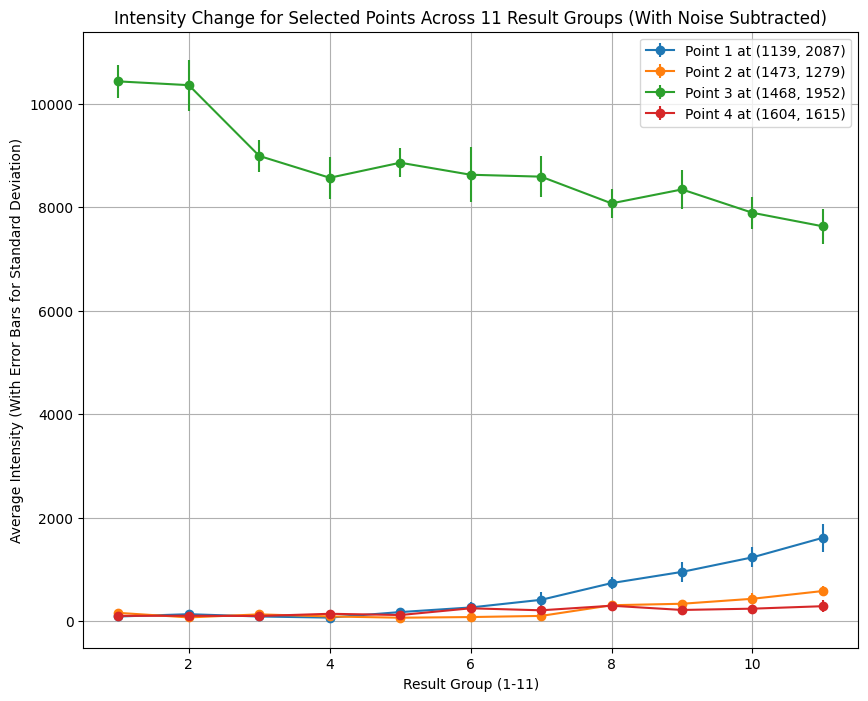

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 第一步：读取TIF格式的base图片数据
base_file_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 21 25到20.5 25\base1.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 初始化列表来存储每个光强点的数值变化和标准差
value_changes = {pos: [] for pos in selected_positions}
value_stddevs = {pos: [] for pos in selected_positions}  # 记录标准差

# 第二步：计算底噪值
# 选择图片四个角靠内的 4×4 区域，行在20到24，列在20到24
def calculate_noise(image_data):
    corners = [
        image_data[20:24, 20:24],  # 左上角
        image_data[20:24, -24:-20],  # 右上角
        image_data[-24:-20, 20:24],  # 左下角
        image_data[-24:-20, -24:-20],  # 右下角
    ]
    noise_values = [corner.mean() for corner in corners]  # 每个角的平均值
    noise_average = np.mean(noise_values)  # 计算所有角的平均值
    return noise_average

# 计算base图片的底噪值
base_noise = calculate_noise(base_data)
print(f"底噪值为: {base_noise}")

# 第三步：读取result1到result75图片，按每5个做一次平均并计算标准差
result_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 21 25到20.5 25'
total_results = 55
group_size = 5
num_groups = total_results // group_size  # 每组5个，生成11组平均结果

for group in range(num_groups):
    result_avg = None
    result_values_per_group = {pos: [] for pos in selected_positions}  # 临时存储每组的每个点值
    start_index = group * group_size + 1  # 每组的起始索引，例如第1组是1-5，第2组是6-10
    
    # 遍历每组的5个result文件
    for i in range(start_index, start_index + group_size):
        result_file_path = os.path.join(result_path, f'result{i}.tif')
        result_image = Image.open(result_file_path)
        result_data = np.array(result_image)

        if result_avg is None:
            result_avg = result_data.astype(np.float64)
        else:
            result_avg += result_data.astype(np.float64)

        # 记录每个点的光强值
        for position in selected_positions:
            result_values_per_group[position].append(result_data[position])

    # 计算该组的平均值
    result_avg /= group_size

    # 第四步：对每个点的周围11×11区域，寻找result中的最小光强值及其位置
    for position in selected_positions:
        row, col = position
        search_region = result_avg[max(0, row-1):min(result_avg.shape[0], row+2), max(0, col-1):min(result_avg.shape[1], col+2)]
        min_value = np.min(search_region)
        min_position = np.unravel_index(np.argmin(search_region), search_region.shape)

        # 由于min_position是相对search_region的，我们需要将它转换为相对于整个图像的位置
        global_min_position = (min_position[0] + max(0, row-5), min_position[1] + max(0, col-5))

        # 输出最小光强点的位置及其光强值
        print(f"在位置{position}附近找到的最小光强点为: {global_min_position}，光强值为: {min_value - base_noise}")

    # 获取之前选定点的平均数值并减去底噪
    print(f"\n处理result{start_index}到result{start_index + group_size - 1}的平均结果:")
    for position in selected_positions:
        value = result_avg[position] - base_noise  # 减去底噪
        value_changes[position].append(value)  # 记录每个光强点的值变化

        # 计算每个点的标准差
        stddev = np.std(result_values_per_group[position])
        value_stddevs[position].append(stddev)  # 记录每个光强点的标准差
        print(f"坐标{position}对应的平均数值为: {value}, 标准差为: {stddev}")

# 第五步：绘制光强随着result不同点的变化及其标准差
plt.figure(figsize=(10, 8))
for i, position in enumerate(selected_positions, start=1):
    means = value_changes[position]
    stddevs = value_stddevs[position]
    plt.errorbar(range(1, num_groups + 1), means, yerr=stddevs, fmt='-o', label=f'Point {i} at {position}')

plt.title('Intensity Change for Selected Points Across 11 Result Groups (With Noise Subtracted)')
plt.xlabel('Result Group (1-11)')
plt.ylabel('Average Intensity (With Error Bars for Standard Deviation)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


第一大和第二大点的中心坐标为: (1143, 1610)
选中的四个点的坐标为:
(1139, 2087)
(1473, 1279)
(1468, 1952)
(1604, 1615)
底噪值为: 220.9375


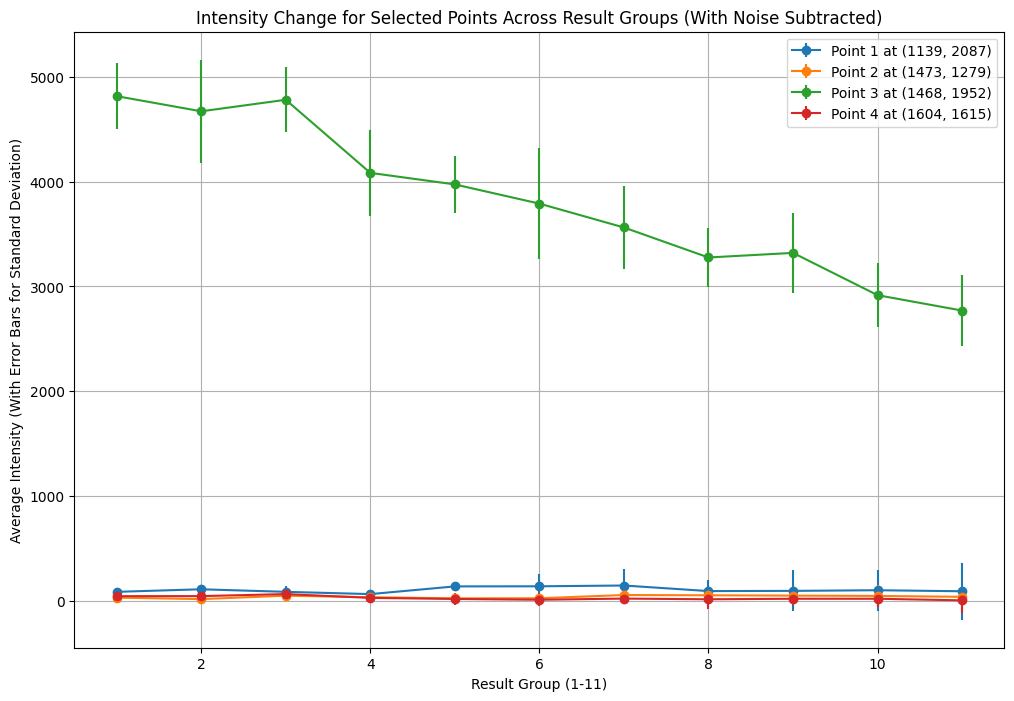

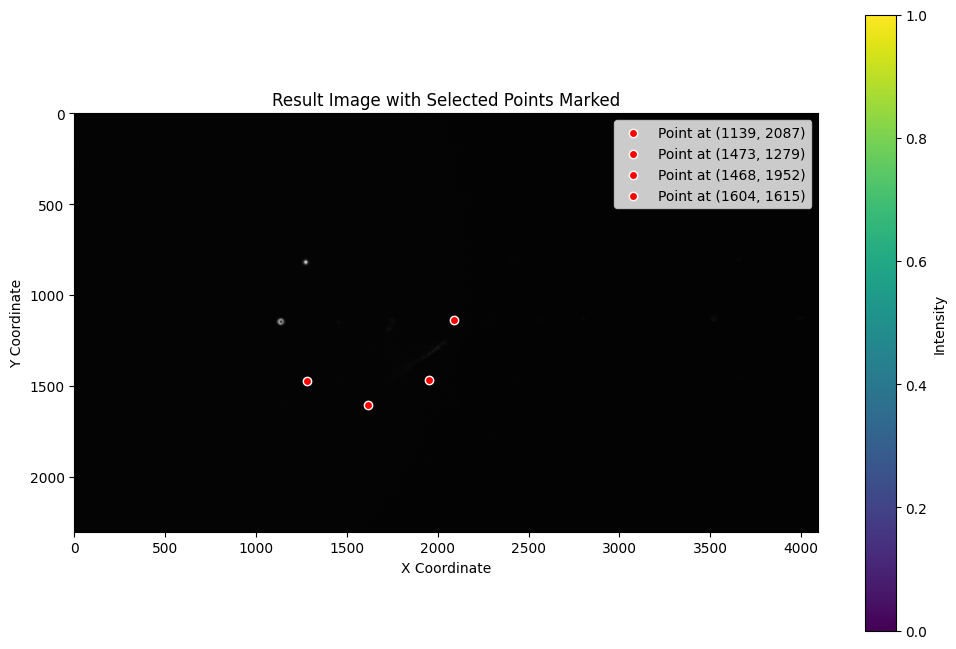

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 第一步：读取TIF格式的base图片数据
base_file_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 21 25到20.5 25\base1.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 初始化列表来存储每个点的数值变化和标准差
point_min_values = {pos: [] for pos in selected_positions}
point_stddevs = {pos: [] for pos in selected_positions}

# 第二步：计算底噪值
def calculate_noise(image_data):
    corners = [
        image_data[20:24, 20:24],  # 左上角
        image_data[20:24, -24:-20],  # 右上角
        image_data[-24:-20, 20:24],  # 左下角
        image_data[-24:-20, -24:-20],  # 右下角
    ]
    noise_values = [corner.mean() for corner in corners]  # 每个角的平均值
    noise_average = np.mean(noise_values)  # 计算所有角的平均值
    return noise_average

# 计算base图片的底噪值
base_noise = calculate_noise(base_data)
print(f"底噪值为: {base_noise}")

# 第三步：读取result1到result75图片，按每5个做一次平均并计算标准差
result_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 21 25到20.5 25'
total_results = 55
group_size = 5
num_groups = total_results // group_size  # 每组5个，生成11组平均结果

# 记录每个点的光强值和标准差
for group in range(num_groups):
    result_avg = None
    result_values_per_group = {pos: [] for pos in selected_positions}  # 临时存储每组的每个点值
    start_index = group * group_size + 1  # 每组的起始索引，例如第1组是1-5，第2组是6-10
    
    # 遍历每组的5个result文件
    for i in range(start_index, start_index + group_size):
        result_file_path = os.path.join(result_path, f'result{i}.tif')
        result_image = Image.open(result_file_path)
        result_data = np.array(result_image)

        if result_avg is None:
            result_avg = result_data.astype(np.float64)
        else:
            result_avg += result_data.astype(np.float64)

        # 记录每个点的光强值
        for position in selected_positions:
            result_values_per_group[position].append(result_data[position])

    # 计算该组的平均值
    result_avg /= group_size

    # 对每个选定点，寻找11×11区域内的最小光强值及其位置
    for pos in selected_positions:
        center_x, center_y = pos
        x_min = max(center_x - 5, 0)
        x_max = min(center_x + 6, result_avg.shape[0])
        y_min = max(center_y - 5, 0)
        y_max = min(center_y + 6, result_avg.shape[1])

        region = result_avg[x_min:x_max, y_min:y_max]
        min_value = np.min(region)
        min_position = np.unravel_index(np.argmin(region), region.shape)
        min_position = (x_min + min_position[0], y_min + min_position[1])

        # 记录最小值并计算减去底噪后的值
        point_min_values[pos].append(min_value - base_noise)

        # 计算该点的标准差
        stddev = np.std(result_values_per_group[pos])
        point_stddevs[pos].append(stddev)

# 绘制光强随着result不同点的变化及其标准差
plt.figure(figsize=(12, 8))
for i, position in enumerate(selected_positions, start=1):
    means = point_min_values[position]
    stddevs = point_stddevs[position]
    plt.errorbar(range(1, num_groups + 1), means, yerr=stddevs, fmt='-o', label=f'Point {i} at {position}')

plt.title('Intensity Change for Selected Points Across Result Groups (With Noise Subtracted)')
plt.xlabel('Result Group (1-11)')
plt.ylabel('Average Intensity (With Error Bars for Standard Deviation)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 绘制标记四个最大光强点的图像并标记四个最大光强的位置
result_file_path = os.path.join(result_path, f'result1.tif')
result_image = Image.open(result_file_path)
result_data = np.array(result_image)

plt.figure(figsize=(12, 8))
plt.imshow(result_data, cmap='gray')
for pos in selected_positions:
    plt.scatter(pos[1], pos[0], c='red', label=f'Point at {pos}', edgecolor='white')

plt.title('Result Image with Selected Points Marked')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(loc='best')
plt.colorbar(label='Intensity')
plt.show()


第一大和第二大点的中心坐标为: (1307, 1206)
选中的四个点的坐标为:
(1144, 1135)
(1137, 2084)
(1464, 1953)
(1603, 1615)
底噪值为: 219.265625

处理result1的结果:
坐标(1144, 1135)对应的数值为: 1188.734375
坐标(1137, 2084)对应的数值为: 6669.734375
坐标(1464, 1953)对应的数值为: 6602.734375
坐标(1603, 1615)对应的数值为: 39.734375

处理result2的结果:
坐标(1144, 1135)对应的数值为: 836.734375
坐标(1137, 2084)对应的数值为: 5972.734375
坐标(1464, 1953)对应的数值为: 6748.734375
坐标(1603, 1615)对应的数值为: 70.734375

处理result3的结果:
坐标(1144, 1135)对应的数值为: 830.734375
坐标(1137, 2084)对应的数值为: 5091.734375
坐标(1464, 1953)对应的数值为: 6895.734375
坐标(1603, 1615)对应的数值为: 31.734375

处理result4的结果:
坐标(1144, 1135)对应的数值为: 130.734375
坐标(1137, 2084)对应的数值为: 5752.734375
坐标(1464, 1953)对应的数值为: 7115.734375
坐标(1603, 1615)对应的数值为: 63.734375

处理result5的结果:
坐标(1144, 1135)对应的数值为: 362.734375
坐标(1137, 2084)对应的数值为: 4358.734375
坐标(1464, 1953)对应的数值为: 7409.734375
坐标(1603, 1615)对应的数值为: 63.734375

处理result6的结果:
坐标(1144, 1135)对应的数值为: 164.734375
坐标(1137, 2084)对应的数值为: 4211.734375
坐标(1464, 1953)对应的数值为: 7225.734375
坐标(1603, 1615)对应的数值为: 108.734375


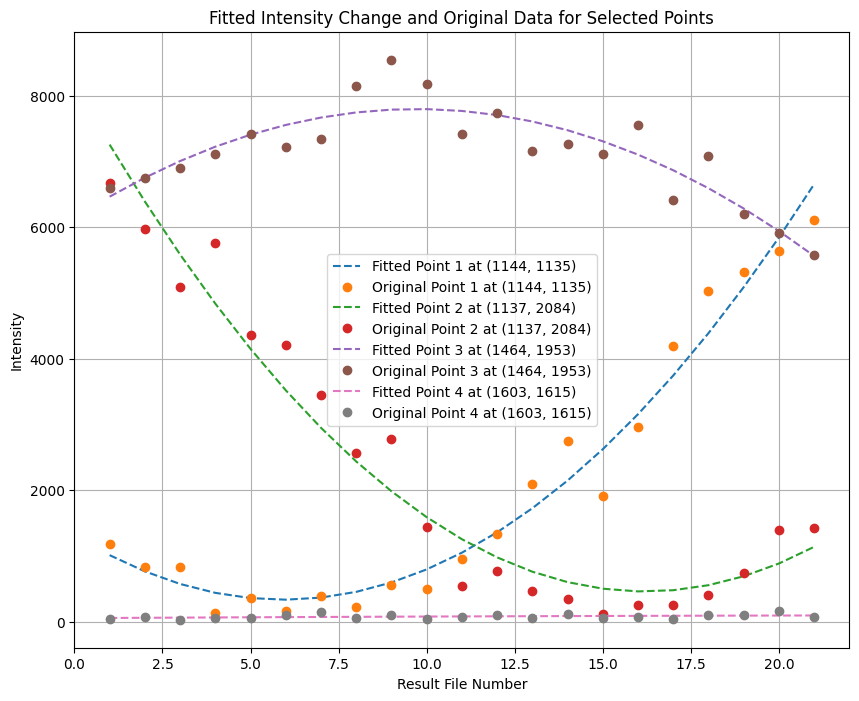

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from numpy.polynomial.polynomial import Polynomial

# 第一步：读取TIF格式的base图片数据
base_file_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 ac变化\9.11 ac变化\abase0.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 初始化列表来存储每个光强点的数值变化
value_changes = {pos: [] for pos in selected_positions}

# 第二步：计算底噪值
def calculate_noise(image_data):
    corners = [
        image_data[20:24, 20:24],  # 左上角
        image_data[20:24, -24:-20],  # 右上角
        image_data[-24:-20, 20:24],  # 左下角
        image_data[-24:-20, -24:-20],  # 右下角
    ]
    noise_values = [corner.mean() for corner in corners]  # 每个角的平均值
    noise_average = np.mean(noise_values)  # 计算所有角的平均值
    return noise_average

# 计算base图片的底噪值
base_noise = calculate_noise(base_data)
print(f"底噪值为: {base_noise}")

# 第三步：读取result1到result75图片，逐个处理
result_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 ac变化\9.11 ac变化'
total_results = 21

for i in range(1, total_results + 1):
    result_file_path = os.path.join(result_path, f'aresult{i}.tif')
    result_image = Image.open(result_file_path)
    result_data = np.array(result_image)

    # 获取之前选定点的数值并减去底噪
    print(f"\n处理result{i}的结果:")
    for position in selected_positions:
        value = result_data[position] - base_noise  # 减去底噪
        value_changes[position].append(value)  # 记录每个光强点的值变化
        print(f"坐标{position}对应的数值为: {value}")

# 第四步：拟合光强点光子数变化曲线，并计算导数平方除以光子数
degree = 2  # 选择拟合的多项式次数，比如二次多项式拟合
fitted_values = {pos: [] for pos in selected_positions}  # 初始化拟合后的数值变化字典
photon_derivatives_ratio_fitted = {pos: [] for pos in selected_positions}  # 初始化存储结果的字典

for position in selected_positions:
    means = np.array(value_changes[position])  # 获取平均值变化
    x = np.arange(1, len(means) + 1)  # 定义 x 轴，表示 result 文件的序号

    # 对每个点拟合二次多项式
    coefs = np.polyfit(x, means, degree)
    poly = np.poly1d(coefs)  # 生成多项式函数

    # 计算拟合后的值
    fitted_means = poly(x)
    fitted_values[position] = fitted_means  # 保存拟合后的数值

    # 计算拟合曲线的导数
    derivative_poly = np.polyder(poly)  # 多项式导数
    derivatives_fitted = derivative_poly(x)  # 计算导数值
    derivatives_squared_fitted = derivatives_fitted ** 2  # 计算导数的平方

    # 计算导数平方除以拟合曲线上的光子数
    ratio_fitted = derivatives_squared_fitted / fitted_means
    photon_derivatives_ratio_fitted[position] = ratio_fitted  # 保存结果

    # 输出每个点的导数平方除以光子数的数值
    print(f"\n光强点 {position} 光子数拟合曲线的导数平方除以光子数的结果为:")
    for i, val in enumerate(ratio_fitted, start=1):
        print(f"第{i}组结果: {val}")

# 第五步：绘制拟合后的四个光强点的数值变化在同一张图中
plt.figure(figsize=(10, 8))

for i, position in enumerate(selected_positions, start=1):
    means = value_changes[position]  # 原始数据的均值
    fitted_means = fitted_values[position]  # 拟合后的均值

    # 绘制拟合后的曲线
    plt.plot(range(1, total_results + 1), fitted_means, '--', label=f'Fitted Point {i} at {position}')
    
    # 绘制原始数据
    plt.plot(range(1, total_results + 1), means, 'o', label=f'Original Point {i} at {position}')

plt.title('Fitted Intensity Change and Original Data for Selected Points')
plt.xlabel('Result File Number')
plt.ylabel('Intensity')
plt.legend(loc='best')
plt.grid(True)
plt.show()


第一大和第二大点的中心坐标为: (1307, 1206)
选中的四个点的坐标为:
(1144, 1135)
(1137, 2084)
(1464, 1953)
(1603, 1615)
底噪值为: 219.265625

处理result1的结果:
坐标(1144, 1135)对应的数值为: 1188.734375
坐标(1137, 2084)对应的数值为: 6669.734375
坐标(1464, 1953)对应的数值为: 6602.734375
坐标(1603, 1615)对应的数值为: 39.734375

处理result2的结果:
坐标(1144, 1135)对应的数值为: 836.734375
坐标(1137, 2084)对应的数值为: 5972.734375
坐标(1464, 1953)对应的数值为: 6748.734375
坐标(1603, 1615)对应的数值为: 70.734375

处理result3的结果:
坐标(1144, 1135)对应的数值为: 830.734375
坐标(1137, 2084)对应的数值为: 5091.734375
坐标(1464, 1953)对应的数值为: 6895.734375
坐标(1603, 1615)对应的数值为: 31.734375

处理result4的结果:
坐标(1144, 1135)对应的数值为: 130.734375
坐标(1137, 2084)对应的数值为: 5752.734375
坐标(1464, 1953)对应的数值为: 7115.734375
坐标(1603, 1615)对应的数值为: 63.734375

处理result5的结果:
坐标(1144, 1135)对应的数值为: 362.734375
坐标(1137, 2084)对应的数值为: 4358.734375
坐标(1464, 1953)对应的数值为: 7409.734375
坐标(1603, 1615)对应的数值为: 63.734375

处理result6的结果:
坐标(1144, 1135)对应的数值为: 164.734375
坐标(1137, 2084)对应的数值为: 4211.734375
坐标(1464, 1953)对应的数值为: 7225.734375
坐标(1603, 1615)对应的数值为: 108.734375


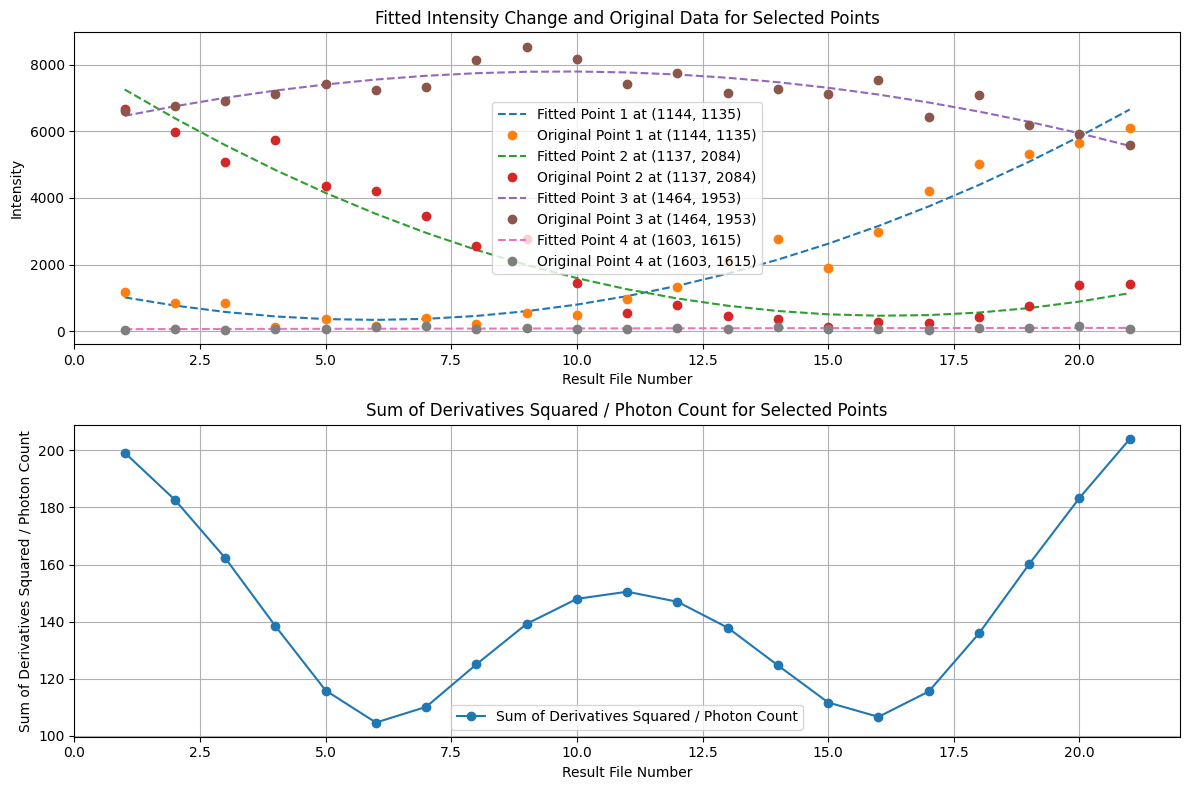

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 第一步：读取TIF格式的base图片数据
base_file_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 ac变化\9.11 ac变化\abase0.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 初始化列表来存储每个光强点的数值变化
value_changes = {pos: [] for pos in selected_positions}

# 第二步：计算底噪值
def calculate_noise(image_data):
    corners = [
        image_data[20:24, 20:24],  # 左上角
        image_data[20:24, -24:-20],  # 右上角
        image_data[-24:-20, 20:24],  # 左下角
        image_data[-24:-20, -24:-20],  # 右下角
    ]
    noise_values = [corner.mean() for corner in corners]  # 每个角的平均值
    noise_average = np.mean(noise_values)  # 计算所有角的平均值
    return noise_average

# 计算base图片的底噪值
base_noise = calculate_noise(base_data)
print(f"底噪值为: {base_noise}")

# 第三步：读取result1到result75图片，逐个处理
result_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 ac变化\9.11 ac变化'
total_results = 21

for i in range(1, total_results + 1):
    result_file_path = os.path.join(result_path, f'aresult{i}.tif')
    result_image = Image.open(result_file_path)
    result_data = np.array(result_image)

    # 获取之前选定点的数值并减去底噪
    print(f"\n处理result{i}的结果:")
    for position in selected_positions:
        value = result_data[position] - base_noise  # 减去底噪
        value_changes[position].append(value)  # 记录每个光强点的值变化
        print(f"坐标{position}对应的数值为: {value}")

# 第四步：拟合光强点光子数变化曲线，并计算导数平方除以光子数
degree = 2  # 选择拟合的多项式次数，比如二次多项式拟合
fitted_values = {pos: [] for pos in selected_positions}  # 初始化拟合后的数值变化字典
photon_derivatives_ratio_fitted = {pos: [] for pos in selected_positions}  # 初始化存储结果的字典

# 保存每个点的导数平方除以光子数的结果总和
sum_photon_derivatives_ratio = np.zeros(total_results)

for position in selected_positions:
    means = np.array(value_changes[position])  # 获取平均值变化
    x = np.arange(1, len(means) + 1)  # 定义 x 轴，表示 result 文件的序号

    # 对每个点拟合二次多项式
    coefs = np.polyfit(x, means, degree)
    poly = np.poly1d(coefs)  # 生成多项式函数

    # 计算拟合后的值
    fitted_means = poly(x)
    fitted_values[position] = fitted_means  # 保存拟合后的数值

    # 计算拟合曲线的导数
    derivative_poly = np.polyder(poly)  # 多项式导数
    derivatives_fitted = derivative_poly(x)  # 计算导数值
    derivatives_squared_fitted = derivatives_fitted ** 2  # 计算导数的平方

    # 计算导数平方除以拟合曲线上的光子数
    ratio_fitted = derivatives_squared_fitted / fitted_means
    photon_derivatives_ratio_fitted[position] = ratio_fitted  # 保存结果

    # 将每个光强点的结果加到总和中
    sum_photon_derivatives_ratio += ratio_fitted

    # 输出每个点的导数平方除以光子数的数值
    print(f"\n光强点 {position} 光子数拟合曲线的导数平方除以光子数的结果为:")
    for i, val in enumerate(ratio_fitted, start=1):
        print(f"第{i}组结果: {val}")

# 输出导数平方除以光子数的总和结果
print("\n所有光强点的导数平方除以光子数的总和结果为:")
for i, val in enumerate(sum_photon_derivatives_ratio, start=1):
    print(f"第{i}组结果: {val}")

# 第五步：绘制拟合后的四个光强点的数值变化和导数平方除以光子数的总和
plt.figure(figsize=(12, 8))

# 绘制拟合后的光子数变化和原始数据对比
plt.subplot(2, 1, 1)
for i, position in enumerate(selected_positions, start=1):
    means = value_changes[position]  # 原始数据的均值
    fitted_means = fitted_values[position]  # 拟合后的均值

    # 绘制拟合后的曲线
    plt.plot(range(1, total_results + 1), fitted_means, '--', label=f'Fitted Point {i} at {position}')
    
    # 绘制原始数据的点
    plt.plot(range(1, total_results + 1), means, 'o', label=f'Original Point {i} at {position}')

plt.title('Fitted Intensity Change and Original Data for Selected Points')
plt.xlabel('Result File Number')
plt.ylabel('Intensity')
plt.legend(loc='best')
plt.grid(True)

# 绘制导数平方除以光子数的总和
plt.subplot(2, 1, 2)
plt.plot(range(1, total_results + 1), sum_photon_derivatives_ratio, 'o-', label='Sum of Derivatives Squared / Photon Count')
plt.title('Sum of Derivatives Squared / Photon Count for Selected Points')
plt.xlabel('Result File Number')
plt.ylabel('Sum of Derivatives Squared / Photon Count')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# 第一步：读取TIF格式的base图片数据
base_file_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 ac变化\9.11 ac变化\abase0.tif'
base_image = Image.open(base_file_path)
base_data = np.array(base_image)

# 保存原始数据以备后续操作
df_original_base = base_data.copy()

# 初始化列表来存储最大值及其坐标
top_values_base = []
top_positions_base = []

# 找到第一大和第二大光强点，并确保两点的距离不小于50
for i in range(2):
    while True:
        max_intensity = np.max(base_data)
        max_position = np.unravel_index(np.argmax(base_data), base_data.shape)
        
        if i == 1 and np.linalg.norm(np.array(max_position) - np.array(top_positions_base[0])) < 50:
            base_data[max_position] = 0  # 距离太近则重新寻找，将最大值设为0
            continue

        # 保存最大光强及其坐标
        top_values_base.append(max_intensity)
        top_positions_base.append(max_position)

        # 将找到的最大值设为0，避免再次选中
        base_data[max_position] = 0
        break

# 计算第一大和第二大光强点的中心坐标
center = ((top_positions_base[0][0] + top_positions_base[1][0]) // 2, 
          (top_positions_base[0][1] + top_positions_base[1][1]) // 2)
print(f"第一大和第二大点的中心坐标为: {center}")

# 根据中心坐标找另外三个点（不包括第一大点）
while len(top_values_base) < 5:  # 寻找3个额外点，总共需要5个点
    max_intensity = np.max(base_data)
    max_position = np.unravel_index(np.argmax(base_data), base_data.shape)

    # 检查与已选最大光强点的距离是否小于50
    if any(np.linalg.norm(np.array(max_position) - np.array(pos)) <= 50 for pos in top_positions_base):
        base_data[max_position] = 0  # 将距离太近的点设为0并重新寻找
        continue

    # 检查与中心对称点的距离是否小于300
    symmetric_position = (2 * center[0] - max_position[0], 2 * center[1] - max_position[1])
    if any(np.linalg.norm(np.array(symmetric_position) - np.array(pos)) <= 300 for pos in top_positions_base):
        base_data[max_position] = 0  # 距离不符合要求则重新寻找
        continue

    # 保存有效的最大光强及其坐标
    top_values_base.append(max_intensity)
    top_positions_base.append(max_position)

    # 将找到的最大值设为0，避免再次选中
    base_data[max_position] = 0

# 输出四个选中点的坐标（包括第一大点）
selected_positions = [top_positions_base[0]] + top_positions_base[2:]  # 保留第一大点，并选出后续三个点
print("选中的四个点的坐标为:")
for position in selected_positions:
    print(position)

# 初始化列表来存储每个光强点的数值变化
value_changes = {pos: [] for pos in selected_positions}

# 第二步：计算底噪值
def calculate_noise(image_data):
    corners = [
        image_data[20:24, 20:24],  # 左上角
        image_data[20:24, -24:-20],  # 右上角
        image_data[-24:-20, 20:24],  # 左下角
        image_data[-24:-20, -24:-20],  # 右下角
    ]
    noise_values = [corner.mean() for corner in corners]  # 每个角的平均值
    noise_average = np.mean(noise_values)  # 计算所有角的平均值
    return noise_average

# 计算base图片的底噪值
base_noise = calculate_noise(base_data)
print(f"底噪值为: {base_noise}")

# 第三步：读取result1到result75图片，逐个处理
result_path = r'C:\Users\11455\Desktop\wkx1\程序\HCL\24.9.11\HCL\9.11 ac变化\9.11 ac变化'
total_results = 21

for i in range(1, total_results + 1):
    result_file_path = os.path.join(result_path, f'aresult{i}.tif')
    result_image = Image.open(result_file_path)
    result_data = np.array(result_image)

    # 获取之前选定点的数值并减去底噪
    print(f"\n处理result{i}的结果:")
    for position in selected_positions:
        value = result_data[position] - base_noise  # 减去底噪
        value_changes[position].append(value)  # 记录每个光强点的值变化
        print(f"坐标{position}对应的数值为: {value}")

# 第四步：拟合光强点光子数变化曲线，并计算导数平方除以光子数
degree = 2  # 选择拟合的多项式次数，比如二次多项式拟合
fitted_values = {pos: [] for pos in selected_positions}  # 初始化拟合后的数值变化字典
photon_derivatives_ratio_fitted = {pos: [] for pos in selected_positions}  # 初始化存储结果的字典

# 保存每个点的导数平方除以光子数的结果总和
sum_photon_derivatives_ratio = np.zeros(total_results)

for position in selected_positions:
    means = np.array(value_changes[position])  # 获取平均值变化
    x = np.arange(1, len(means) + 1)  # 定义 x 轴，表示 result 文件的序号

    # 对每个点拟合二次多项式
    coefs = np.polyfit(x, means, degree)
    poly = np.poly1d(coefs)  # 生成多项式函数

    # 计算拟合后的值
    fitted_means = poly(x)
    fitted_values[position] = fitted_means  # 保存拟合后的数值

    # 计算拟合曲线的导数
    derivative_poly = np.polyder(poly)  # 多项式导数
    derivatives_fitted = derivative_poly(x)  # 计算导数值
    derivatives_squared_fitted = derivatives_fitted ** 2  # 计算导数的平方

    # 计算导数平方除以拟合曲线上的光子数
    ratio_fitted = derivatives_squared_fitted / fitted_means
    photon_derivatives_ratio_fitted[position] = ratio_fitted  # 保存结果

    # 将每个光强点的结果加到总和中
    sum_photon_derivatives_ratio += ratio_fitted

    # 输出每个点的导数平方除以光子数的数值
    print(f"\n光强点 {position} 光子数拟合曲线的导数平方除以光子数的结果为:")
    for i, val in enumerate(ratio_fitted, start=1):
        print(f"第{i}组结果: {val}")

# 输出导数平方除以光子数的总和结果
print("\n所有光强点的导数平方除以光子数的总和结果为:")
for i, val in enumerate(sum_photon_derivatives_ratio, start=1):
    print(f"第{i}组结果: {val}")

# 第五步：绘制拟合后的四个光强点的数值变化和导数平方除以光子数的总和
plt.figure(figsize=(12, 8))

# 绘制拟合后的光子数变化和原始数据对比
plt.subplot(2, 1, 1)
for i, position in enumerate(selected_positions, start=1):
    means = value_changes[position]  # 原始数据的均值
    fitted_means = fitted_values[position]  # 拟合后的均值

    # 绘制拟合后的曲线
    plt.plot(range(1, total_results + 1), fitted_means, '--', label=f'Fitted Point {i} at {position}')
    
    # 绘制原始数据的点
    plt.plot(range(1, total_results + 1), means, 'o', label=f'Original Point {i} at {position}')

plt.title('Fitted Intensity Change and Original Data for Selected Points')
plt.xlabel('Result File Number')
plt.ylabel('Intensity')
plt.legend(loc='best')
plt.grid(True)

# 绘制导数平方除以光子数的总和
plt.subplot(2, 1, 2)
plt.plot(range(1, total_results + 1), sum_photon_derivatives_ratio, 'o-', label='Sum of Derivatives Squared / Photon Count')
plt.title('Sum of Derivatives Squared / Photon Count for Selected Points')
plt.xlabel('Result File Number')
plt.ylabel('Sum of Derivatives Squared / Photon Count')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()
请你把这个程序中选择的四个点坐标变为你现在给我的这个程序所选择的四个点的坐标，再执行之后的第四步和第五步